# Data Preprocessing
Menyiapkan data
  * mencari id pelanggan(nomer telepon) yang valid
  * mengatasi data-data yang masih kosong (missing value)
  * mengatasi nilai-nilai pencilan(otlier) dari tiap variable
  * menstandardisasi nilai variable

In [103]:
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

Untuk detail datanya adalah sebagai berikut:

* UpdatedAt Periode of Data taken
* customerID Customer ID
* gender Whether the customer is a male or a female (Male, Female)
* SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
* Partner Whether the customer has a partner or not (Yes, No)
* Dependents Whether the customer has dependents or not (Yes, No)
* tenure Number of months the customer has stayed with the company
* PhoneService Whether the customer has a phone service or not (Yes, No)
* MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges The amount charged to the customer monthly
* TotalCharges The total amount charged to the customer
* Churn Whether the customer churned or not (Yes or No)

# load data

In [104]:
import pandas as pd

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# menampilkan jumlah baris dan kolom
print(df_load.shape)

# menampilkan 5 data teratas
print(df_load.head())

# menampilkan total customer id yang memiliki id unique
print(df_load['customerID'].nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBi

# Memfilter ID Number Pelanggan Format Tertentu

In [105]:
df_load['valid'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid'] == True]).drop('valid', axis=1)
print(df_load['customerID'].count())

7006


# Memfilter Duplikasi ID Number Pelanggan

In [106]:
# drop duplicates rows
df_load.drop_duplicates()

# drop duplicate ID sorted by period
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
df_load['customerID'].count()

6993

# kesimpulan
validitas dari id number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. berdasarkan dari hasil tersebut tedapat perbedaan jumlah nomor id dari pertama load sampai dengan hasil akhir.
* pertama sebanyak 7113 row dan 22 columns dengan 7017 unique
* kedua (setelah pengecekan validasi) sebanyak 6993

# Mengatasi Missing Values dengan Penghapusan Rows

In [107]:
# cek total missing values
print('Total missing values pada churn', df_load['Churn'].isnull().sum())

# menghapus missing value pada churn
df_load.dropna(subset=['Churn'], inplace=True)
print('Total data setelah menghapus missing values', df_load.shape)

Total missing values pada churn 43
Total data setelah menghapus missing values (6950, 22)


# Mengatasi Missing Values dengan Pengisian Nilai tertentu

In [108]:
# mengatasi missing value pada Tenure dengan diisi nilai 11
df_load['tenure'].fillna(11, inplace=True)

# variable yang bersifat numeric selain Tenure diisi dengan median dari masing" value
for i in list(['MonthlyCharges', 'TotalCharges']):
  median = df_load[i].median()
  df_load[i] = df_load[i].fillna(median)

In [109]:
df_load.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# mendeteksi adanya outlier

In [110]:
df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


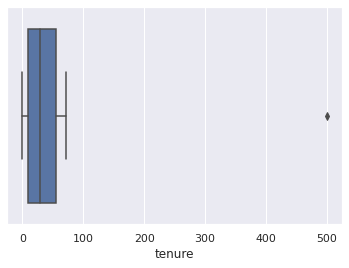

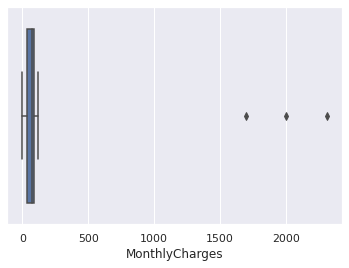

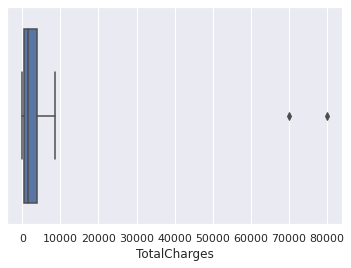

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# # manual
plt.figure()
sns.boxplot(x = df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x = df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x = df_load['TotalCharges'])
plt.show()

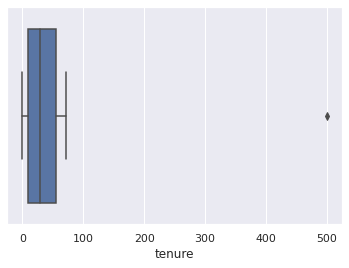

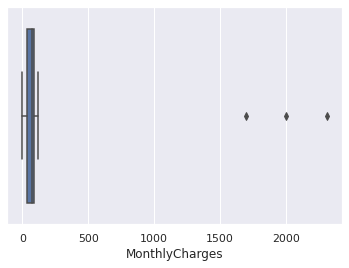

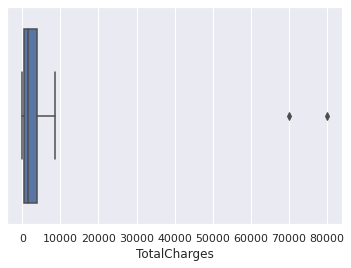

In [112]:
# # with looping
for i in list(['tenure', 'MonthlyCharges', 'TotalCharges']):
  plt.figure()
  sns.boxplot(x=df_load[i])
  plt.show()

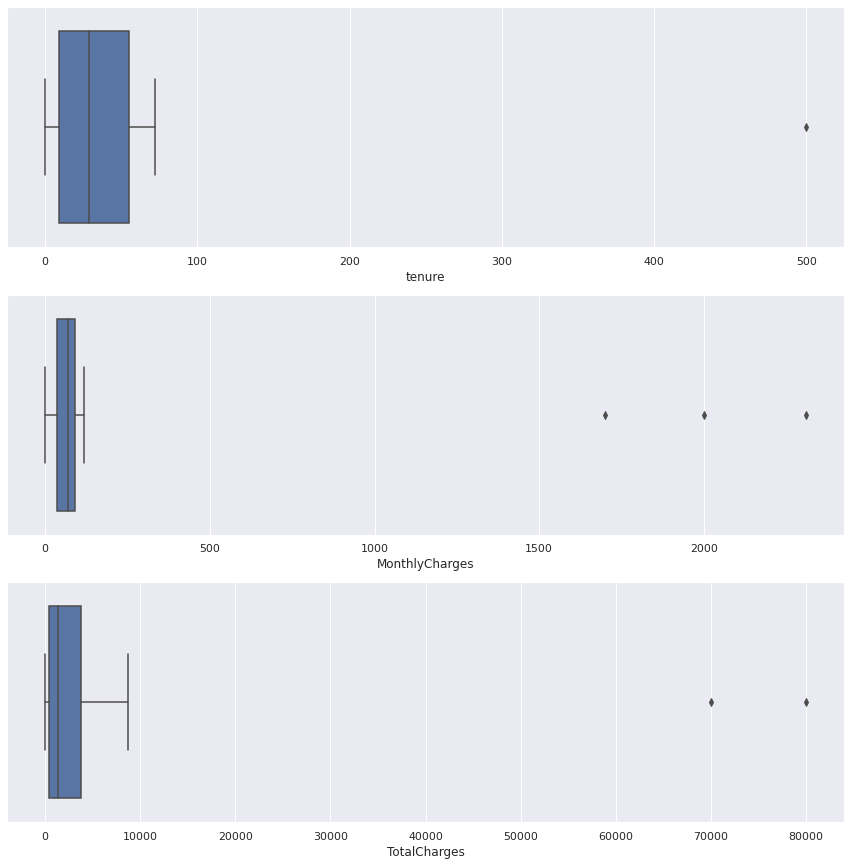

In [113]:
# subplot
feature = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,15))

for i, feature in enumerate(feature, 1):
  plt.subplot(3,1, i)
  sns.boxplot(x=df_load[feature])

# Mengatasi Outlier dengan Interquartile range (IQR)

In [114]:
Q1 = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.25)
Q3 = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.75)
IQR = Q3 - Q1

maximum = (Q3 + 1.5 * IQR)
print('Nilai maximum dari masing-masing variable adalah:')
print(maximum)

minimum = (Q1 - 1.5 * IQR)
print('Nilai minimum dari masing-masing variable adalah:')
print(minimum)

# cleaning
more_then = (df_load > maximum)
less_then = (df_load < minimum)

df_load = df_load.mask(more_then, maximum, axis=1)
df_load = df_load.mask(less_then, minimum, axis=1)

print('Pesebaran data setelah di tangani outlier')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Nilai maximum dari masing-masing variable adalah:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64
Nilai minimum dari masing-masing variable adalah:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64
Pesebaran data setelah di tangani outlier
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


<ipython-input-114-6d2fe441d93b>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_then = (df_load > maximum)
<ipython-input-114-6d2fe441d93b>:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  less_then = (df_load < minimum)


In [115]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


<ipython-input-115-4dbbfea03a56>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
<ipython-input-115-4dbbfea03a56>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


# Mendeteksi Nilai yang tidak standar

In [116]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
	print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

# Menstandarisasi variable kategori

In [117]:
df_load = df_load.replace(['Wanita','Laki-Laki','Iya','Churn'], ['Female','Male','Yes','Yes'])

for col_name in list(['gender','Dependents','Churn']):
  print(df_load[col_name].value_counts())

Male      3505
Female    3445
Name: gender, dtype: int64
No     4870
Yes    2080
Name: Dependents, dtype: int64
No     5114
Yes    1836
Name: Churn, dtype: int64


# Tahapan modeling setelah cleaning data
* Melakukan Exploratory Data Analysis
* Melakukan Data pre-processing
* Melakukan Pemodelan Machine Learning
* Menentukan Model Terbaik

# Exploratory Data Analysis memungkinan analyst memahami isi data yang digunakan mulai dari:
  * distribusi
  * frekuensi
  * korelasi
  * dll
## EDA dilakukan dengan beberapa cara:
  * Univariat Analysis - analisis desriptif dengan satu variabel
  * Bivariat Analysis - analisis relasi dengan dua variabel yang biasanya dengan target variable
  * Multivariat Analysis - analisis yang menggunakan lebih dari atau sama dengan tiga variabel
## Dalam kasus ini kita diminta untuk melihat persebaran dari
  * Presentase persebaran data churn dan tidaknya dari seluruh data
  * persebaran data dari variable predictor terhadap label (Churn)

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

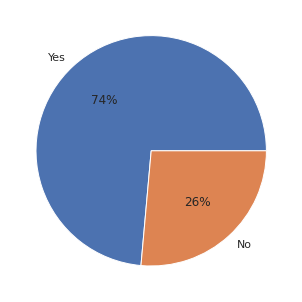

In [119]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Yes', 'No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

* pada tahap C.1 dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.


# EDA variabel Numerik
memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

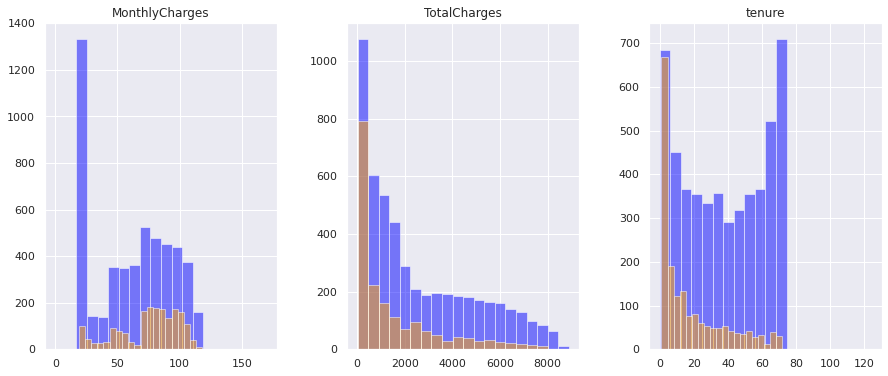

In [120]:
feature = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
df_load[df_load.Churn == 'No'][feature].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][feature].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

* pada tahap ini dapat kita ketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.

# EDA Variabel kategorik
melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian mengiterpretasikannya

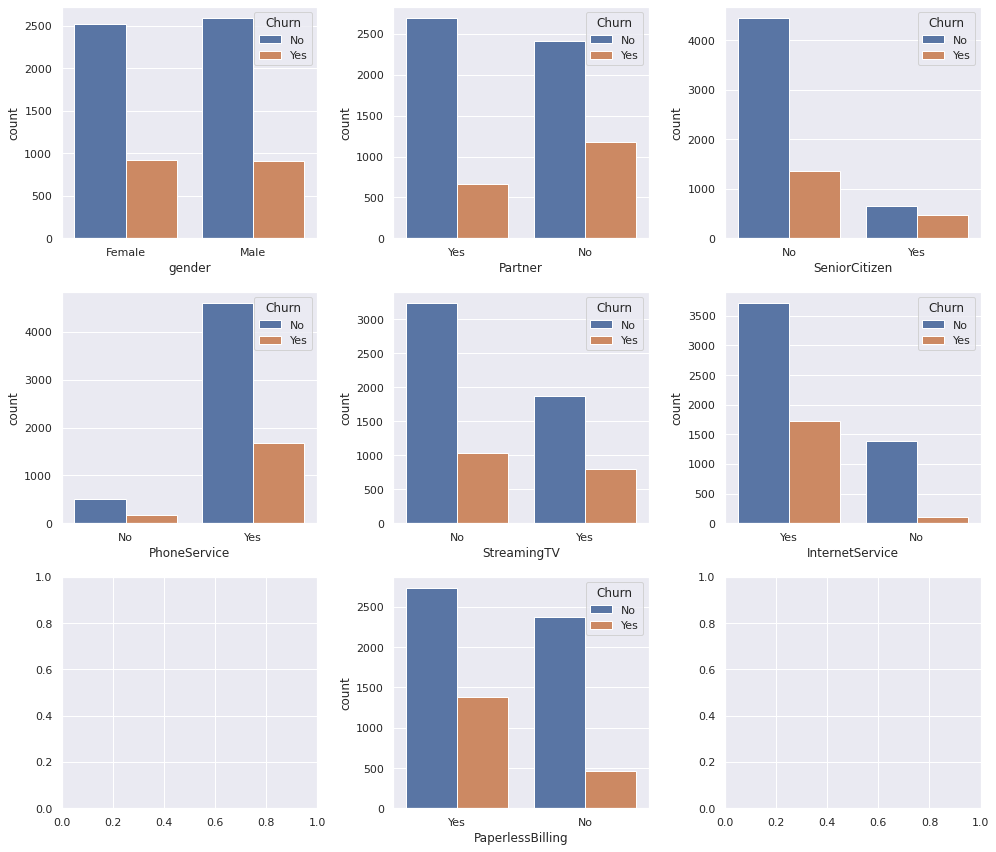

In [121]:
fig, ax = plt.subplots(3, 3, figsize=(14,12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

* pada tahap C.3 dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

# Menghapus Unnecessary Columns dari data


In [122]:
# cleaned_df = df_load.drop(columns=['customerID','UpdatedAt'])
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)

cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


# Melakukan Data pre-processing
Encoding Data

In [123]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

for data in cleaned_df.columns:
  if cleaned_df[data].dtype == np.number: continue

  cleaned_df[data] = LabelEncoder().fit_transform(cleaned_df[data])

cleaned_df.describe()

<ipython-input-123-cd766ec94d26>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[data].dtype == np.number: continue
<ipython-input-123-cd766ec94d26>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[data].dtype == np.number: continue
<ipython-input-123-cd766ec94d26>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[data].dtype == np.number: continue
<ipython-input-123-cd766ec94d26>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[data].dtype == np.number: continue
<ipython-input-123-cd766ec94d26>:5: DeprecationWarni

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


In [124]:
from sklearn.model_selection import train_test_split
x = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah:',x_train.shape, ', sedangkan jumlah baris dan kolom dari y_train adalah:',y_train.shape)
print('presentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))

print('\nJumlah baris dan kolom dari x_test adalah:', x_test.shape, ', sedangkan Jumlah baris dan kolom di y_test adalah:', y_test.shape)
print('presentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan jumlah baris dan kolom dari y_train adalah: (4865,)
presentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom di y_test adalah: (2085,)
presentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


# Pembuatan model
algoritma LogisticRegression

In [125]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah:', log_model)

Model Logistic Regression yang terbentuk adalah: LogisticRegression()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Performansi model Training - Menampilkan Metrics

In [126]:
from sklearn.metrics import classification_report

y_pred = log_model.predict(x_train)

print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.79      4865



## Performasi Model Training - Menampilkan plots

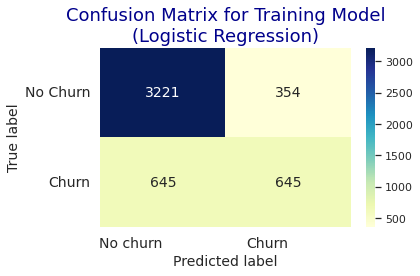

In [127]:
from sklearn.metrics import confusion_matrix

confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('No Churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## Performansi Data Testing - Menampilkan Metrics

In [128]:
y_pred = log_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.79      0.79      2085



## Performansi Data Testing - Menampilkan Plots

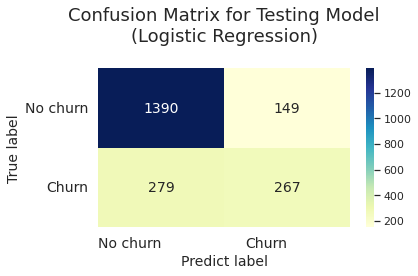

In [129]:
# create dataframe
confusion_df = pd.DataFrame((confusion_matrix(y_test,y_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

heatmap = sns.heatmap(confusion_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predict label', fontsize=14)
plt.tight_layout()
plt.show()

* Jika kita menggunakan menggunakan algoritma logistic regression dengan memanggil LogisticRegression() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
* Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detil tebakan churn yang sebenernya benar churn adalah 638, tebakan tidak churn yang sebenernya tidak churn adalah 3237, tebakan tidak churn yang sebenernya benar churn adalah 652 dan tebakan churn yang sebenernya tidak churn adalah 338.
* Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 264, tebakan tidak churn yang sebenernya tidak churn adalah 1392, tebakan tidak churn yang sebenernya benar churn adalah 282 dan tebakan churn yang sebenernya tidak churn adalah 146.

# Pembuatan model
RandomForestClassifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


## Performansi Data Training - Menampilkan Matrics

In [131]:
y_pred = rdf_model.predict(x_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



## Performasi Data Training Menampilkan Plots

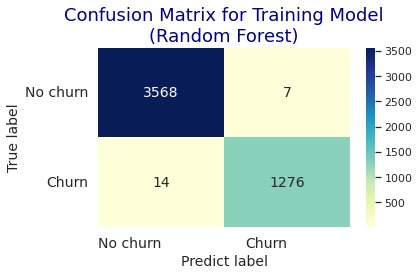

In [132]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

heatmap = sns.heatmap(confusion_matrix_df, annot=True, fmt='d', annot_kws={'size':14}, cmap='YlGnBu')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predict label', fontsize=14)
plt.tight_layout()
plt.show()

## Performa data testing - menampilkan matrics

In [133]:
y_pred = rdf_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.60      0.48      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.77      0.78      0.77      2085



## Performansi Data Testing - Menampilkan Plots

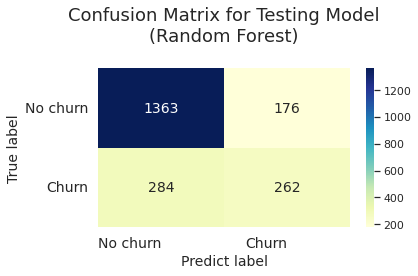

In [134]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No churn', 'Churn'), ('No churn','Churn'))

heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predict label', fontsize=14)
plt.tight_layout()
plt.show()

* Jika kita menggunakan menggunakan algoritma Random Forest dengan memanggil RandomForestClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
* Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detil tebakan churn yang sebenernya benar churn adalah 1278, tebakan tidak churn yang sebenernya tidak churn adalah 3566, tebakan tidak churn yang sebenernya benar churn adalah 12 dan tebakan churn yang sebenernya tidak churn adalah 9.
* Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 262, tebakan tidak churn yang sebenernya tidak churn adalah 1360, tebakan tidak churn yang sebenernya benar churn adalah 284 dan tebakan churn yang sebenernya tidak churn adalah 179.

# Pembuatan Model
GradientBoostingClassifier()

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbc_model)

GradientBoostingClassifier()


## Performansi Model Data Training - Menampilkan Matrics

In [136]:
y_pred = gbc_model.predict(x_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



## Performasi Model Data Training - Menampilkan plot

[Text(0.5, 0, 'No churn'), Text(1.5, 0, 'Churn')]

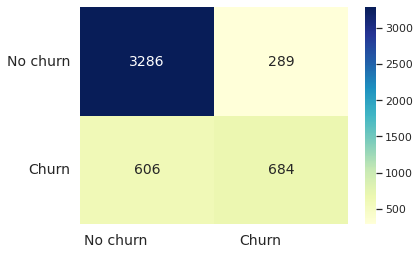

In [137]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)



## Performasi Model Data Testing - Menampilkan Matrics

In [138]:
y_pred = gbc_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



[Text(0.5, 0, 'No churn'), Text(1.5, 0, 'Churn')]

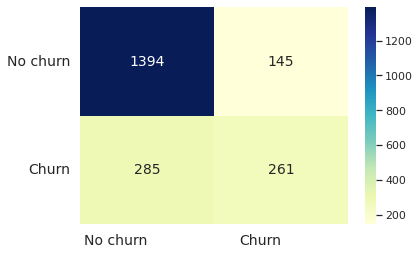

In [139]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
headmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
headmap.yaxis.set_ticklabels(headmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
headmap.xaxis.set_ticklabels(headmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

* Jika kita menggunakan menggunakan algoritma Gradient Boosting dengan memanggil GradientBoostingClassifier() dari package sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
* Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detil tebakan churn yang sebenernya benar churn adalah 684, tebakan tidak churn yang sebenernya tidak churn adalah 3286, tebakan tidak churn yang sebenernya benar churn adalah 606 dan tebakan churn yang sebenernya tidak churn adalah 289.
* Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 261, tebakan tidak churn yang sebenernya tidak churn adalah 1394, tebakan tidak churn yang sebenernya benar churn adalah 285 dan tebakan churn yang sebenernya tidak churn adalah 145.

# Menentukan Algoritma Model Terbaik

Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

* Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
* Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.
* Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.

Selanjutnya kita akan menentukan model algoritma terbaik dari model yang sudah di lakukan di atas (Appropriate-Fitting), kemudian kita simpan sebagai file best_model_churn.pkl dengan tujuan untuk deployment model nantinya kita tidak perlu mengulang lagi pemodelan, cukup memanggil file tersebut saja. Simpan di file direktori sesuai dataset berada, kemudian check apakah file tersebut benar tersimpan atau tidak. Gunakan dump() dari pickle untuk menyimpan file.

# Save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb')

In [140]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression().fit(x_train, y_train)

# save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))

print(log_model)

LogisticRegression()


<ipython-input-140-94a019ae4125>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-140-94a019ae4125>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-140-94a019ae4125>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-140-94a019ae4125>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-140-94a019ae4125>:12: Dep

In [145]:
LR = pickle.load(open('best_model_churn.pkl', 'rb'))

y = LR.predict(x_train)
print(y)

[0 0 0 ... 1 0 0]


Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.